# Homework 4

**StudentID**: 21127113  
**Name**: Dinh Duong Hai Nam

## Exercise 1

From the formula in slide 23, Lecture 07 we have:
$$
\epsilon = \sqrt{\frac{8}{N} ln\frac{4m_{H}(2N)}{\delta}}
$$
The title gives us $\epsilon = 0.05$, $\delta = 0.05$ and $m_{H}(N) \le N^{d_{VC}}$. So in order to find N:
$$
0.05 = \sqrt{\frac{8}{N} ln\frac{4(2N)^{10}}{0.05}}
$$ (my_label)


Solving N we have $452956.86447$, which is near to **[d]. 460,000**

### Exercise 1 - Python Approach

Reference:
- [Github](https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_1_Generalization_Error.ipynb)
- [Medium.com](https://medium.com/@pokharelbikash981/finding-roots-of-mathematical-equations-using-python-7541fdd6e3b7)

How to use brentq and fsolve:
- [scipy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html)

In [1]:
%matplotlib inline
import numpy as np
from scipy.optimize import fsolve
from scipy.optimize import brentq

import matplotlib.pyplot as plt

Having this equation:

$$
f(N) = \sqrt{\frac{8}{N} ln\frac{4m_{H}(2N)}{\delta}} - \epsilon
$$
We need to solve $f(N)$, here is how to do it with Python

In [2]:
# Define a function f(N) like above
def f(N, delta=0.05, epsilon=0.05, d_vc=10):
    return np.sqrt(8/N * np.log(4/delta * (2*N)**d_vc)) - epsilon

fsolve(f, x0=480000)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3980\2062767032.py:3: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(8/N * np.log(4/delta * (2*N)**d_vc)) - epsilon
C:\Users\Admin\AppData\Local\Temp\ipykernel_3980\2062767032.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(8/N * np.log(4/delta * (2*N)**d_vc)) - epsilon


array([452956.8647231])

In [3]:
MIN_N = 400000
MAX_N = 480000 
ans = brentq(f, MIN_N, MAX_N)
ans

452956.8647230993

This giving alternative **[d]. 460,000**. Another approach is using pyplot

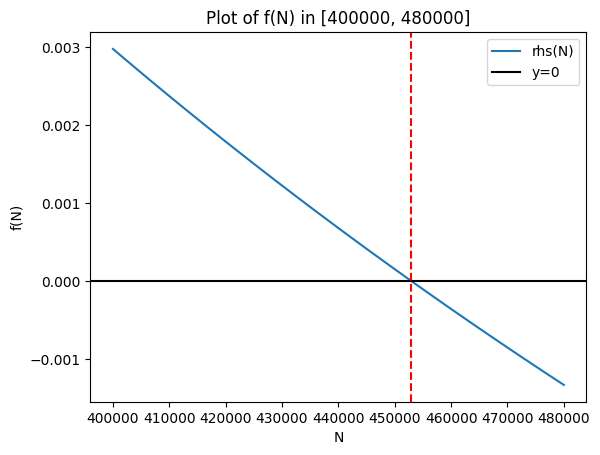

In [4]:
# Create a range of N values within the specified range
N_values = np.linspace(400000, 480000, 100)

# Calculate rhs values for the range of N
f_values = [f(N) for N in N_values]

# Plot the results
plt.plot(N_values, f_values, label='rhs(N)')
plt.axhline(0, color='black', label='y=0')  # Add the y=0 line
plt.axvline(ans, color='red', linestyle='--')
plt.xlabel('N')
plt.ylabel('f(N)')
plt.title('Plot of f(N) in [400000, 480000]')
plt.legend()
plt.show()

The plot is giving the root point's nearest answer is **[d]. 460,000**

## Exercise 2

Reference:
- [homefish](https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_2_plot_bounds.ipynb)

For $N > d_{vc}$, we can use the approximation $m_H(N) = N^{d_{vc}}$, as mentioned in [Exercise 1](#exercise-1)

For **[c]** and **[d]**, we move $\epsilon$ to the RHS and use a numerical solver (here is *scipy.optimize.brentq*) to find $\epsilon$. Since $\epsilon$ is a probabilistic value, its range is **[0, 1]**

In [5]:
d_vc = 50
delta = 0.05

def vc_bound(N):
    return np.sqrt(8/N * np.log(4/delta * (2*N)**d_vc))

def rademacher(N):
    return np.sqrt((2/N * np.log(2*N*(N**d_vc)))) + np.sqrt(2/N * np.log(1/delta)) + 1/N

def parrondo(N):
    # define a lambda function to find epsilon
    f = lambda eps: np.sqrt((2*eps + np.log(6/delta * (2*N)**d_vc))/N) - eps
    # solve epsilon with range [0,1]
    return brentq(f, 0, 1)

def devroye(N):
    # doing the same for parrondo
    f = lambda eps: np.sqrt((4*eps*(1+eps) + np.log(4/delta) + 2*d_vc*np.log(N))/(2* N)) - eps
    return brentq(f, 0, 1)

Giving N = 10,000. we run through all bounds to find lowest value

In [6]:
def ans(N = 10000.0):
    print(vc_bound(N), rademacher(N), parrondo(N), devroye(N))
    return
ans()

0.632174915200836 0.3313087859616395 0.22369829368078561 0.21522804980824667


So the lowest bound here is **[d]. Devroye's Method**

## Exercise 3
With $N < d_{VC} \Leftrightarrow m_{H}(N) = 2^N$. We rewrite all functions above:

In [7]:
d_vc = 50
delta = 0.05

def vc_bound(N):
    return np.sqrt(8/N * np.log(4/delta * 2**(2*N)))

def rademacher(N):
    return np.sqrt((2/N * np.log(2*N*2**N))) + np.sqrt(2/N * np.log(1/delta)) + 1/N

def parrondo(N):
    # define a lambda function to find epsilon
    f = lambda eps: np.sqrt((2*eps + np.log(6/delta * 2**(2*N)))/N) - eps
    # solve epsilon with range [0, 5], with small N, it seems the value is going upper 1
    return brentq(f, 0, 5)

def devroye(N):
    # doing the same for parrondo
    f = lambda eps: np.sqrt((4*eps*(1+eps) + np.log(4/delta) + N*np.log(2**N))/(2* N)) - eps
    return brentq(f, 0, 5)

In [8]:
def ans(N = 5.0):
    print(vc_bound(N))
    print(rademacher(N))
    print(parrondo(N))
    print(devroye(N))
    return
ans()

4.254597220000659
2.813654929686762
1.7439535969958095
2.264540762867992


So according to above answers, the **Parrondo's one** is the smallest, so alternative **[c]**.

## Exercise 4

In [9]:

xDraw = np.linspace(-1, 1, 50)
def f(x):
    return np.sin(np.pi*x)


# D is the number of datasets
# This function below return lists of g, the number of g is D
def ex4(D):
    a = np.zeros(D)

    for i in range(D):
        x = np.random.uniform(-1, 1, 2)
        y = f(x)

        # in order to use np pinv we need to make x 2-dimensional
        x = x.reshape((2,1))

        # linear regresion on model y = ax
        a[i] = np.linalg.pinv(x) @ y
        
        plt.plot(xDraw, a[i]*xDraw, color=(0.5, 0.5, 0.5, 0.1))

    return a

In [10]:
# Define the number of datasets here
D = 100

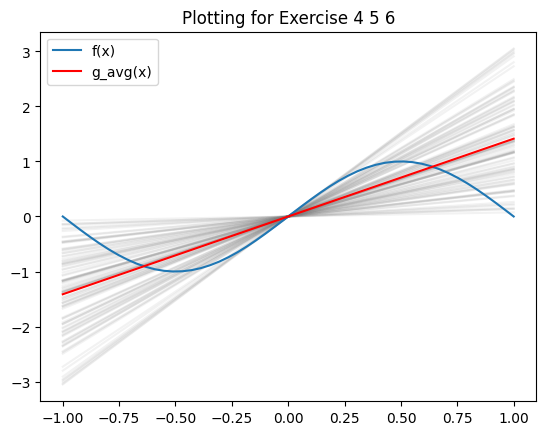

The a_hat (weight of g_avg) for exercise is 1.4133851478877413


In [11]:
g = ex4(D)
g_avg = np.average(g)

# PLot f(x)
plt.plot(xDraw, f(xDraw),label='f(x)')

#PLot g_average(x)
plt.plot(xDraw, xDraw * g_avg, color='red', label='g_avg(x)')
plt.title('Plotting for Exercise 4 5 6')
plt.legend()
plt.show()

print('The a_hat (weight of g_avg) for exercise is', g_avg)

So the answer **isnt matching** to any of the answers, alternative **[e]. None of the above**

## Exercise 5
The formula to calculate bias here is:
$$bias(x) = (\overline{g}(x) - f(x))^2$$

The bias for exercise 5:  0.4208370642978555


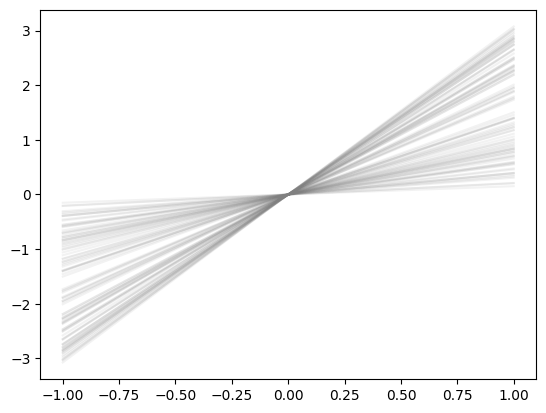

In [12]:
# calculate bias for D points
# Bias
plt.clf()
def ex5():
    g_avg = np.average(ex4(D))
    bias = 0
    for _ in range(D):
        x = np.random.uniform(-1, 1, 2)
        y = f(x)
        
        bias += np.average((y - g_avg * x)**2)
    
    bias = bias / D

    return bias

print('The bias for exercise 5: ',ex5())
    

The answer is alternative **[b]. 0.3**

## Exercise 6
The formula to calculate variance here is:
$$var(x) = 𝔼_{\mathcal{D}} [(\overline{g}^{\mathcal{D}}(x) - g(x))^2]$$
We calculate the variance for each dataset then take average of them:

The variance for exercise 6 is: 0.22097206822871335


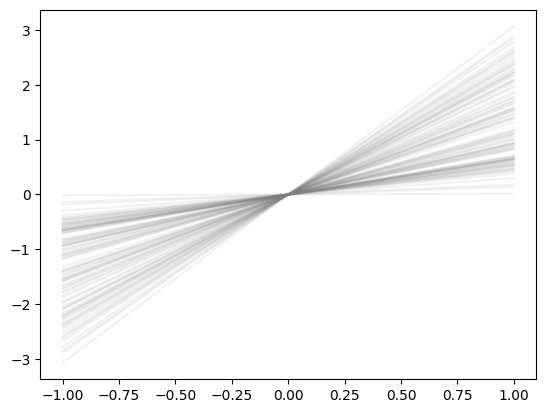

In [13]:
# calcualte variance
# generate D datasets each consists 2 point and calculate variance between them and g_avg

def ex6():
    g_avg = np.average(ex4(D))
    var = 0
    for _ in range(D):
        x = np.random.uniform(-1, 1, 2)
        y = f(x)

        # in order to use np pinv we need to make x 2-dimensional
        x = x.reshape((2,1))

        # linear regresion on model y = ax
        g = np.linalg.pinv(x) @ y

        var += np.average((g*x - g_avg*x)**2)

    var = var / D
    return var
    

print("The variance for exercise 6 is:", ex6())

So the answer for exercise 6 is **[a]**

## Exercise 7